In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [98]:
path = 'population.csv'
population = pd.read_csv(path)
population.head()

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
0,Malaysia,0,32657100,23528200,3649000,3111400,3550500
1,Klang Valley,17,8417800,6181800,827600,719000,895100
2,Johor,1,3794200,2733400,445600,353900,409800
3,Kedah,2,2193600,1554800,282300,209700,254100
4,Kelantan,3,1928900,1258700,202100,211200,271700


In [99]:
population.tail()

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
13,Selangor,10,6555100,4776300,607800,569200,715400
14,Terengganu,11,1275200,822000,120100,138000,178700
15,W.P. Kuala Lumpur,14,1746600,1332700,214200,139200,158300
16,W.P. Labuan,15,100100,69400,8500,10300,11700
17,W.P. Putrajaya,16,116100,72800,5600,10600,21400


In [100]:
population.describe()

,idxs,pop,pop_18,pop_60,pop_12,pop_5
count,18.00,18.00,18.00,18.00,18.00,18.00
mean,8.50,4096222.22,2957677.78,451422.22,385655.56,444227.78
std,5.34,7448206.19,5372726.47,825049.83,706375.77,808941.86
min,0.00,100100.00,69400.00,5600.00,10300.00,11700.00
25%,4.25,1165475.00,819900.00,129975.00,113925.00,126800.00
50%,8.50,1851550.00,1353500.00,230900.00,190850.00,216150.00
75%,12.75,3551825.00,2553975.00,394575.00,337725.00,378850.00
max,17.00,32657100.00,23528200.00,3649000.00,3111400.00,3550500.00


In [101]:
formatting = lambda x: '%.2f' % x
pd.set_option('display.float_format', formatting)
population.describe()

,idxs,pop,pop_18,pop_60,pop_12,pop_5
count,18.00,18.00,18.00,18.00,18.00,18.00
mean,8.50,4096222.22,2957677.78,451422.22,385655.56,444227.78
std,5.34,7448206.19,5372726.47,825049.83,706375.77,808941.86
min,0.00,100100.00,69400.00,5600.00,10300.00,11700.00
25%,4.25,1165475.00,819900.00,129975.00,113925.00,126800.00
50%,8.50,1851550.00,1353500.00,230900.00,190850.00,216150.00
75%,12.75,3551825.00,2553975.00,394575.00,337725.00,378850.00
max,17.00,32657100.00,23528200.00,3649000.00,3111400.00,3550500.00


In [102]:
population[['state', 'pop']]

,state,pop
0,Malaysia,32657100
1,Klang Valley,8417800
2,Johor,3794200
3,Kedah,2193600
4,Kelantan,1928900
5,Melaka,937800
6,Negeri Sembilan,1128900
7,Pahang,1684700
8,Perak,2509000
9,Perlis,255500


In [103]:
population.loc[[0, 1]]

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
0,Malaysia,0,32657100,23528200,3649000,3111400,3550500
1,Klang Valley,17,8417800,6181800,827600,719000,895100


In [104]:
population.iloc[[0, 1]]

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
0,Malaysia,0,32657100,23528200,3649000,3111400,3550500
1,Klang Valley,17,8417800,6181800,827600,719000,895100


In [105]:
population.drop([0, 1], axis = 0, inplace=True)
population

,state,idxs,pop,pop_18,pop_60,pop_12,pop_5
2,Johor,1,3794200,2733400,445600,353900,409800
3,Kedah,2,2193600,1554800,282300,209700,254100
4,Kelantan,3,1928900,1258700,202100,211200,271700
5,Melaka,4,937800,683700,123200,85600,98200
6,Negeri Sembilan,5,1128900,819200,150300,105900,117200
7,Pahang,6,1684700,1188000,198100,172000,192600
8,Perak,8,2509000,1878100,410000,228000,239700
9,Perlis,9,255500,182100,36300,23000,29100
10,Pulau Pinang,7,1774200,1374300,247600,139400,155600
11,Sabah,12,3832500,2716600,249000,426200,411000


In [106]:
population.loc[2]

state       Johor
idxs            1
pop       3794200
pop_18    2733400
pop_60     445600
pop_12     353900
pop_5      409800
Name: 2, dtype: object

In [107]:
population.iloc[0]

state       Johor
idxs            1
pop       3794200
pop_18    2733400
pop_60     445600
pop_12     353900
pop_5      409800
Name: 2, dtype: object

In [108]:
population.drop('idxs', axis=1, inplace=True)

In [109]:
population

,state,pop,pop_18,pop_60,pop_12,pop_5
2,Johor,3794200,2733400,445600,353900,409800
3,Kedah,2193600,1554800,282300,209700,254100
4,Kelantan,1928900,1258700,202100,211200,271700
5,Melaka,937800,683700,123200,85600,98200
6,Negeri Sembilan,1128900,819200,150300,105900,117200
7,Pahang,1684700,1188000,198100,172000,192600
8,Perak,2509000,1878100,410000,228000,239700
9,Perlis,255500,182100,36300,23000,29100
10,Pulau Pinang,1774200,1374300,247600,139400,155600
11,Sabah,3832500,2716600,249000,426200,411000


In [110]:
population['adult'] = population['pop_18'] - population['pop_60']
population

,state,pop,pop_18,pop_60,pop_12,pop_5,adult
2,Johor,3794200,2733400,445600,353900,409800,2287800
3,Kedah,2193600,1554800,282300,209700,254100,1272500
4,Kelantan,1928900,1258700,202100,211200,271700,1056600
5,Melaka,937800,683700,123200,85600,98200,560500
6,Negeri Sembilan,1128900,819200,150300,105900,117200,668900
7,Pahang,1684700,1188000,198100,172000,192600,989900
8,Perak,2509000,1878100,410000,228000,239700,1468100
9,Perlis,255500,182100,36300,23000,29100,145800
10,Pulau Pinang,1774200,1374300,247600,139400,155600,1126700
11,Sabah,3832500,2716600,249000,426200,411000,2467600


In [111]:
population.drop('pop_18', axis=1, inplace=True)
population

,state,pop,pop_60,pop_12,pop_5,adult
2,Johor,3794200,445600,353900,409800,2287800
3,Kedah,2193600,282300,209700,254100,1272500
4,Kelantan,1928900,202100,211200,271700,1056600
5,Melaka,937800,123200,85600,98200,560500
6,Negeri Sembilan,1128900,150300,105900,117200,668900
7,Pahang,1684700,198100,172000,192600,989900
8,Perak,2509000,410000,228000,239700,1468100
9,Perlis,255500,36300,23000,29100,145800
10,Pulau Pinang,1774200,247600,139400,155600,1126700
11,Sabah,3832500,249000,426200,411000,2467600


In [112]:
population['pop_5'] + population['pop_12'] + population['pop_60'] + population['adult'] == population['pop']

2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [113]:
population['babies'] = population['pop'] - (population['pop_5'] + population['pop_12'] + population['pop_60'] + population['adult'])
population

,state,pop,pop_60,pop_12,pop_5,adult,babies
2,Johor,3794200,445600,353900,409800,2287800,297100
3,Kedah,2193600,282300,209700,254100,1272500,175000
4,Kelantan,1928900,202100,211200,271700,1056600,187300
5,Melaka,937800,123200,85600,98200,560500,70300
6,Negeri Sembilan,1128900,150300,105900,117200,668900,86600
7,Pahang,1684700,198100,172000,192600,989900,132100
8,Perak,2509000,410000,228000,239700,1468100,163200
9,Perlis,255500,36300,23000,29100,145800,21300
10,Pulau Pinang,1774200,247600,139400,155600,1126700,104900
11,Sabah,3832500,249000,426200,411000,2467600,278700


In [114]:
population['pop_5'] + population['pop_12'] + population['pop_60'] + population['adult'] + population['babies'] == population['pop']

2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
dtype: bool

In [115]:
# order the column
population = population[['state', 'babies', 'pop_5', 'pop_12', 'adult', 'pop_60', 'pop']]
population


,state,babies,pop_5,pop_12,adult,pop_60,pop
2,Johor,297100,409800,353900,2287800,445600,3794200
3,Kedah,175000,254100,209700,1272500,282300,2193600
4,Kelantan,187300,271700,211200,1056600,202100,1928900
5,Melaka,70300,98200,85600,560500,123200,937800
6,Negeri Sembilan,86600,117200,105900,668900,150300,1128900
7,Pahang,132100,192600,172000,989900,198100,1684700
8,Perak,163200,239700,228000,1468100,410000,2509000
9,Perlis,21300,29100,23000,145800,36300,255500
10,Pulau Pinang,104900,155600,139400,1126700,247600,1774200
11,Sabah,278700,411000,426200,2467600,249000,3832500


In [116]:
# rename the column header

population.rename(columns={'pop': 'total_population', 'pop_5': 'kids', 'pop_12': 'teenagers', 'pop_60': 'elders'}, inplace=True)
population

,state,babies,kids,teenagers,adult,elders,total_population
2,Johor,297100,409800,353900,2287800,445600,3794200
3,Kedah,175000,254100,209700,1272500,282300,2193600
4,Kelantan,187300,271700,211200,1056600,202100,1928900
5,Melaka,70300,98200,85600,560500,123200,937800
6,Negeri Sembilan,86600,117200,105900,668900,150300,1128900
7,Pahang,132100,192600,172000,989900,198100,1684700
8,Perak,163200,239700,228000,1468100,410000,2509000
9,Perlis,21300,29100,23000,145800,36300,255500
10,Pulau Pinang,104900,155600,139400,1126700,247600,1774200
11,Sabah,278700,411000,426200,2467600,249000,3832500


In [117]:
# drop the index and recreate it back

population.reset_index(drop=True, inplace=True)
population

,state,babies,kids,teenagers,adult,elders,total_population
0,Johor,297100,409800,353900,2287800,445600,3794200
1,Kedah,175000,254100,209700,1272500,282300,2193600
2,Kelantan,187300,271700,211200,1056600,202100,1928900
3,Melaka,70300,98200,85600,560500,123200,937800
4,Negeri Sembilan,86600,117200,105900,668900,150300,1128900
5,Pahang,132100,192600,172000,989900,198100,1684700
6,Perak,163200,239700,228000,1468100,410000,2509000
7,Perlis,21300,29100,23000,145800,36300,255500
8,Pulau Pinang,104900,155600,139400,1126700,247600,1774200
9,Sabah,278700,411000,426200,2467600,249000,3832500


In [118]:
# set the index

populationbystate = population.set_index('state')
populationbystate

,babies,kids,teenagers,adult,elders,total_population
state,,,,,,
Johor,297100,409800,353900,2287800,445600,3794200
Kedah,175000,254100,209700,1272500,282300,2193600
Kelantan,187300,271700,211200,1056600,202100,1928900
Melaka,70300,98200,85600,560500,123200,937800
Negeri Sembilan,86600,117200,105900,668900,150300,1128900
Pahang,132100,192600,172000,989900,198100,1684700
Perak,163200,239700,228000,1468100,410000,2509000
Perlis,21300,29100,23000,145800,36300,255500
Pulau Pinang,104900,155600,139400,1126700,247600,1774200


In [119]:
populationbystate.loc[['Johor', 'Selangor', 'Sabah', 'Pahang']]

,babies,kids,teenagers,adult,elders,total_population
state,,,,,,
Johor,297100,409800,353900,2287800,445600,3794200
Selangor,494200,715400,569200,4168500,607800,6555100
Sabah,278700,411000,426200,2467600,249000,3832500
Pahang,132100,192600,172000,989900,198100,1684700


In [120]:
population.loc[population['state'] != 'Johor']

,state,babies,kids,teenagers,adult,elders,total_population
1,Kedah,175000,254100,209700,1272500,282300,2193600
2,Kelantan,187300,271700,211200,1056600,202100,1928900
3,Melaka,70300,98200,85600,560500,123200,937800
4,Negeri Sembilan,86600,117200,105900,668900,150300,1128900
5,Pahang,132100,192600,172000,989900,198100,1684700
6,Perak,163200,239700,228000,1468100,410000,2509000
7,Perlis,21300,29100,23000,145800,36300,255500
8,Pulau Pinang,104900,155600,139400,1126700,247600,1774200
9,Sabah,278700,411000,426200,2467600,249000,3832500
10,Sarawak,183400,286000,289200,1717800,348300,2824700


In [121]:
population[(population['babies'] > population['elders'])]

,state,babies,kids,teenagers,adult,elders,total_population
9,Sabah,278700,411000,426200,2467600,249000,3832500
12,Terengganu,136500,178700,138000,701900,120100,1275200
14,W.P. Labuan,8700,11700,10300,60900,8500,100100
15,W.P. Putrajaya,11300,21400,10600,67200,5600,116100


In [122]:
population[(population['babies'] > population['elders']) & (population['babies'] > population['teenagers'])]

,state,babies,kids,teenagers,adult,elders,total_population
15,W.P. Putrajaya,11300,21400,10600,67200,5600,116100


In [123]:
population.loc[population['state'].str.startswith('W')]

,state,babies,kids,teenagers,adult,elders,total_population
13,W.P. Kuala Lumpur,116400,158300,139200,1118500,214200,1746600
14,W.P. Labuan,8700,11700,10300,60900,8500,100100
15,W.P. Putrajaya,11300,21400,10600,67200,5600,116100


In [124]:
population.loc[population['state'].str.contains('^P')]

,state,babies,kids,teenagers,adult,elders,total_population
5,Pahang,132100,192600,172000,989900,198100,1684700
6,Perak,163200,239700,228000,1468100,410000,2509000
7,Perlis,21300,29100,23000,145800,36300,255500
8,Pulau Pinang,104900,155600,139400,1126700,247600,1774200


In [125]:
population.loc[population['state'].str.contains('g$')]

,state,babies,kids,teenagers,adult,elders,total_population
5,Pahang,132100,192600,172000,989900,198100,1684700
8,Pulau Pinang,104900,155600,139400,1126700,247600,1774200


In [126]:
# state start with p and end with g
population.loc[population['state'].str.contains('^P.+g$')]

,state,babies,kids,teenagers,adult,elders,total_population
5,Pahang,132100,192600,172000,989900,198100,1684700
8,Pulau Pinang,104900,155600,139400,1126700,247600,1774200


In [127]:
# want to pull out Pulau Pinang using regex
population.loc[population['state'].str.contains('^P.+P.+g$')]

,state,babies,kids,teenagers,adult,elders,total_population
8,Pulau Pinang,104900,155600,139400,1126700,247600,1774200


In [128]:
population.describe()

,babies,kids,teenagers,adult,elders,total_population
count,16.00,16.00,16.00,16.00,16.00,16.00
mean,154187.50,221906.25,194462.50,1242450.00,228062.50,2041068.75
std,123694.68,179171.29,154219.86,1052821.72,164879.02,1655494.22
min,8700.00,11700.00,10300.00,60900.00,5600.00,100100.00
25%,82525.00,112450.00,100825.00,641800.00,122425.00,1081125.00
50%,134300.00,185650.00,155700.00,1087550.00,208150.00,1760400.00
75%,184375.00,275275.00,243300.00,1530525.00,298800.00,2587925.00
max,494200.00,715400.00,569200.00,4168500.00,607800.00,6555100.00


In [129]:
population.loc[population['babies'] == population.describe().loc['max','babies']]

,state,babies,kids,teenagers,adult,elders,total_population
11,Selangor,494200,715400,569200,4168500,607800,6555100


In [134]:
population.sort_values(by = ['total_population', 'elders', 'babies'], ascending=[False, True, False])

,state,babies,kids,teenagers,adult,elders,total_population
11,Selangor,494200,715400,569200,4168500,607800,6555100
9,Sabah,278700,411000,426200,2467600,249000,3832500
0,Johor,297100,409800,353900,2287800,445600,3794200
10,Sarawak,183400,286000,289200,1717800,348300,2824700
6,Perak,163200,239700,228000,1468100,410000,2509000
1,Kedah,175000,254100,209700,1272500,282300,2193600
2,Kelantan,187300,271700,211200,1056600,202100,1928900
8,Pulau Pinang,104900,155600,139400,1126700,247600,1774200
13,W.P. Kuala Lumpur,116400,158300,139200,1118500,214200,1746600
5,Pahang,132100,192600,172000,989900,198100,1684700


In [137]:
population['total_population'].sum()
population['total_population'].mean()
population['total_population'].std()
population['total_population'].median()



1760400.0

In [139]:
population['state'].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

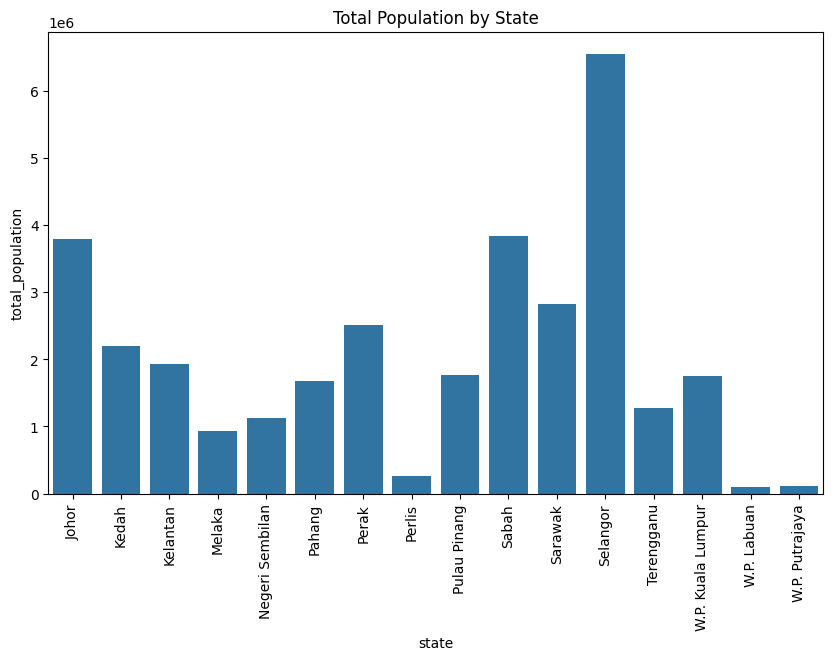

In [141]:
# create a group barchart with label using matplotlib

plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='total_population', data=populationbystate)
plt.xticks(rotation=90)
plt.title('Total Population by State')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Johor'),
  Text(1, 0, 'Kedah'),
  Text(2, 0, 'Kelantan'),
  Text(3, 0, 'Melaka'),
  Text(4, 0, 'Negeri Sembilan'),
  Text(5, 0, 'Pahang'),
  Text(6, 0, 'Perak'),
  Text(7, 0, 'Perlis'),
  Text(8, 0, 'Pulau Pinang'),
  Text(9, 0, 'Sabah'),
  Text(10, 0, 'Sarawak'),
  Text(11, 0, 'Selangor'),
  Text(12, 0, 'Terengganu'),
  Text(13, 0, 'W.P. Kuala Lumpur'),
  Text(14, 0, 'W.P. Labuan'),
  Text(15, 0, 'W.P. Putrajaya')])

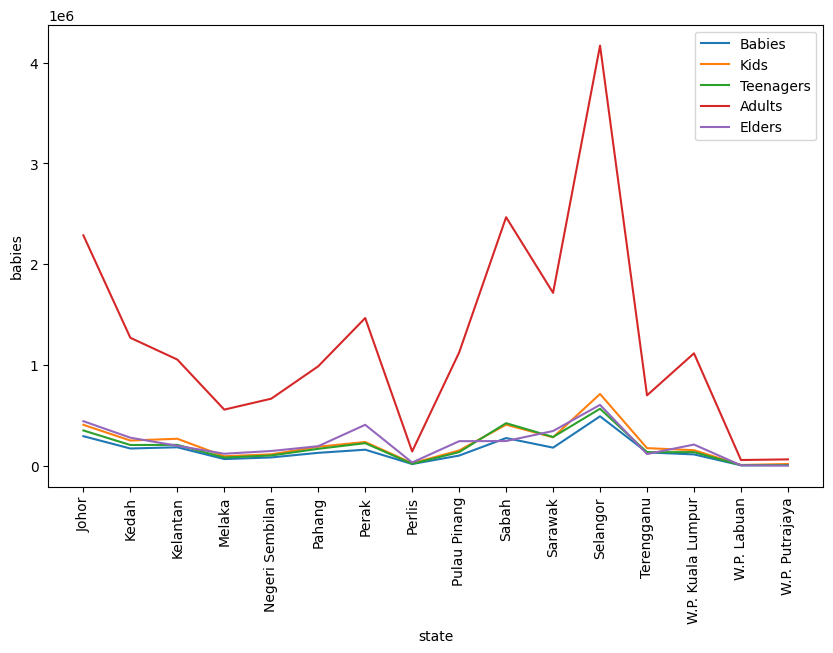

In [144]:
# create a line graph with all categories using matplotlib

plt.figure(figsize=(10, 6))
sns.lineplot(x='state', y='babies', data=populationbystate, label='Babies')
sns.lineplot(x='state', y='kids', data=populationbystate, label='Kids')
sns.lineplot(x='state', y='teenagers', data=populationbystate, label='Teenagers')
sns.lineplot(x='state', y='adult', data=populationbystate, label='Adults')
sns.lineplot(x='state', y='elders', data=populationbystate, label='Elders')
plt.xticks(rotation=90)


Text(0, 0.5, 'Population')

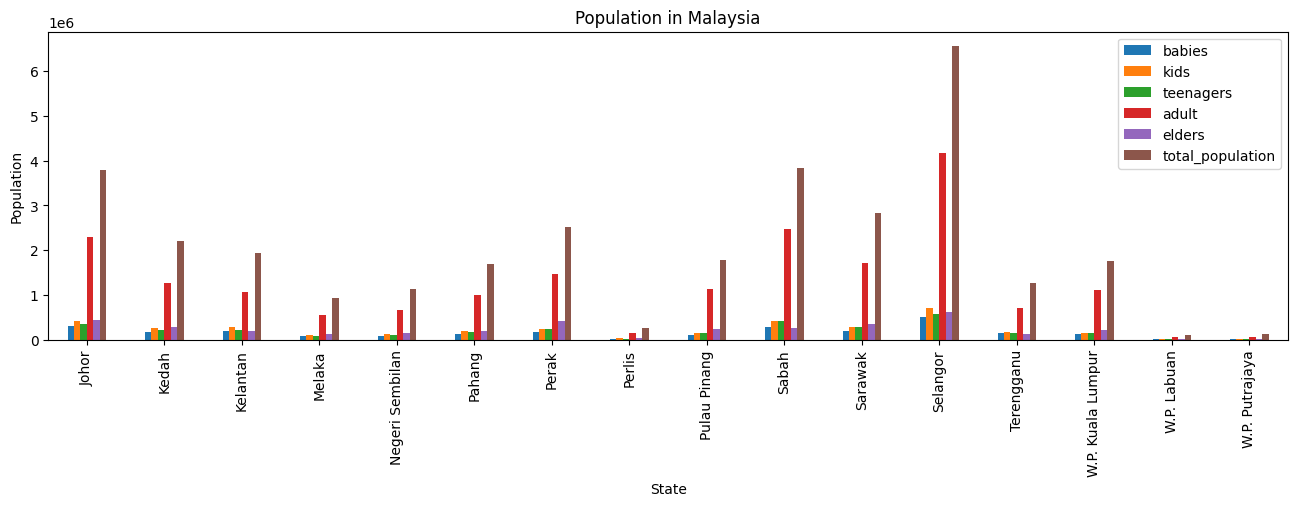

In [146]:
populationbystate.plot(kind = 'bar', figsize=(16,4))
plt.title('Population in Malaysia')
plt.xlabel('State')
plt.ylabel('Population')

<Axes: >

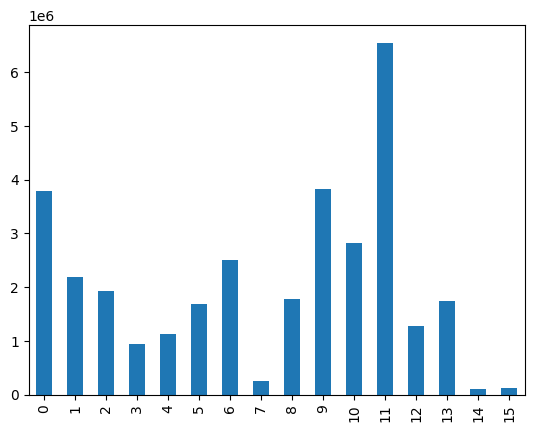

In [148]:
population['total_population'].plot(kind= 'bar')

<BarContainer object of 16 artists>

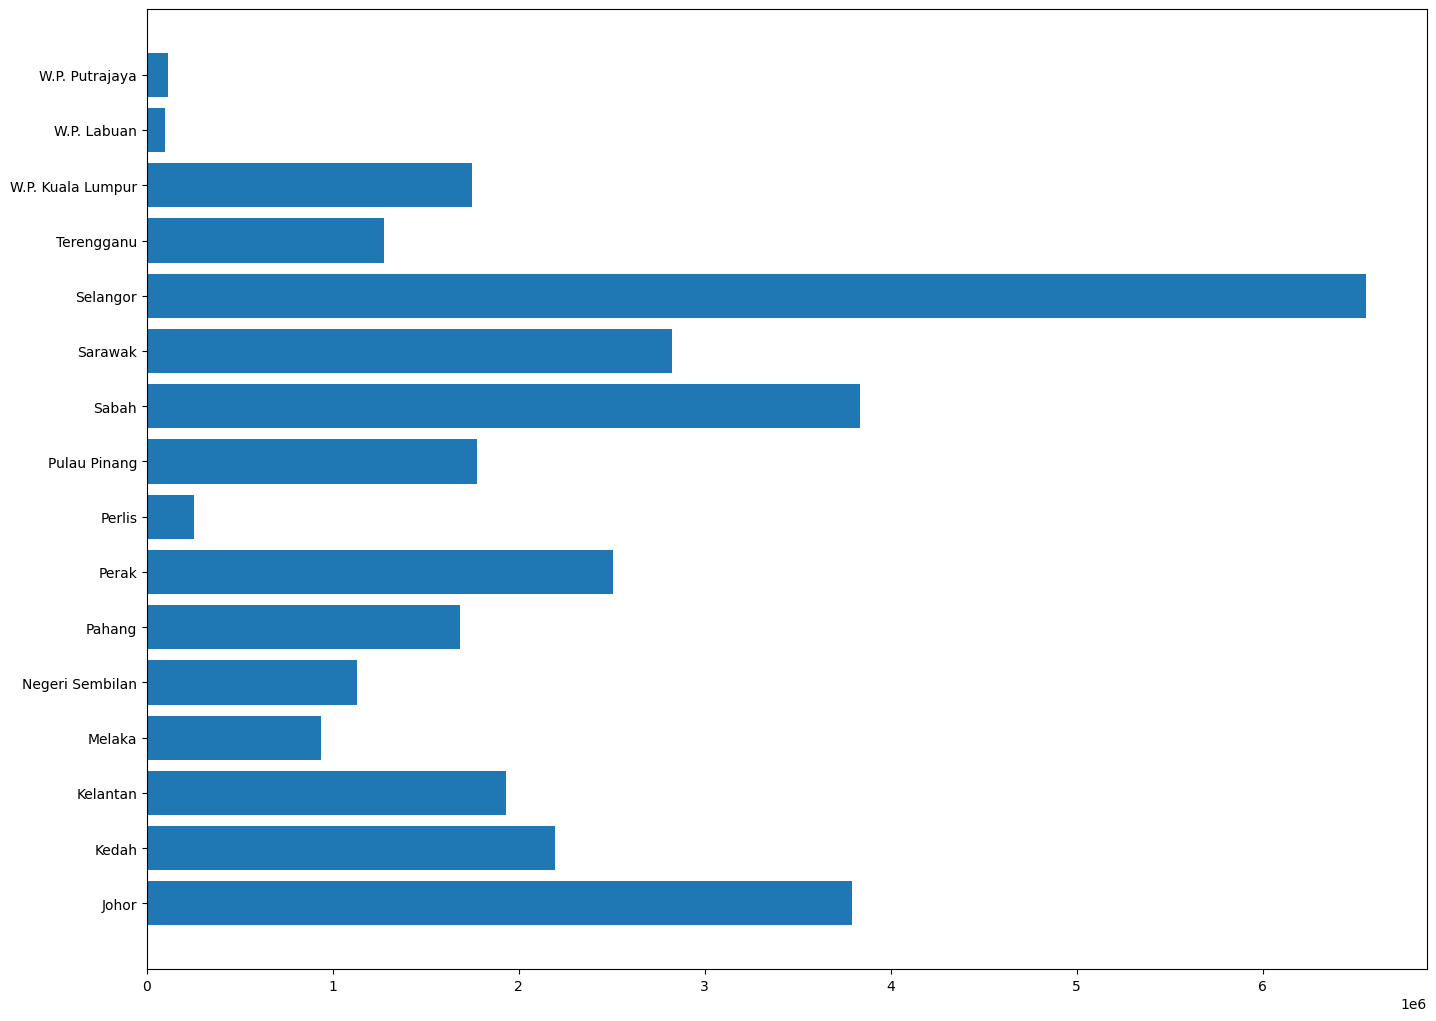

In [150]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])

ax.barh(population['state'], population['total_population'])